In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("..//data//iris.csv")

### Checking the data

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Checking the data types of each column

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Checking the Descriptive status 

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Check If theres any duplicate rows in our dataset

no duplicated rows in our dataset

In [6]:
df[df.duplicated()]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


### Check if theres any missing values in our dataset

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### Visulazing the counts of predicted features

[]

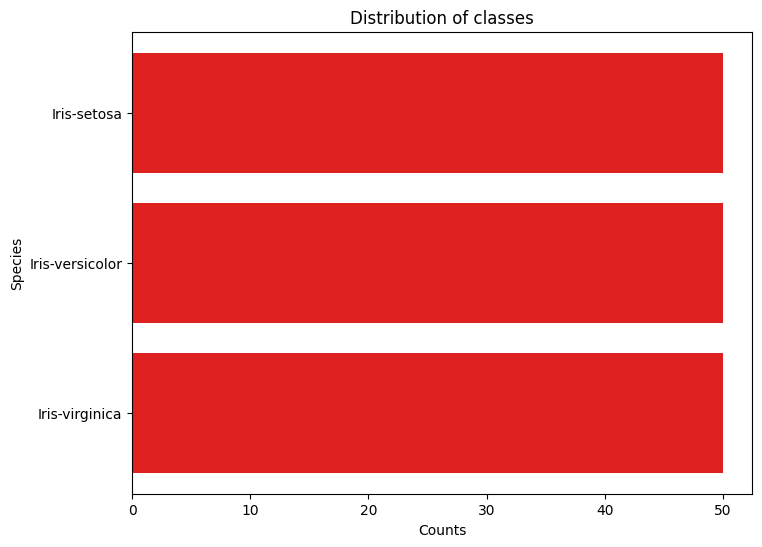

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(df["Species"], color="red")
plt.xlabel("Counts")
plt.title("Distribution of classes")
plt.plot()

### Insights

1) Data has no missing values
2) Data is Balanced
3) All features are numeric

### Univariate Analysis

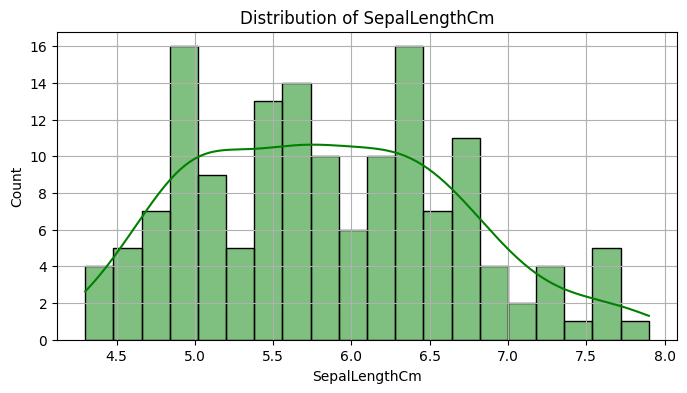

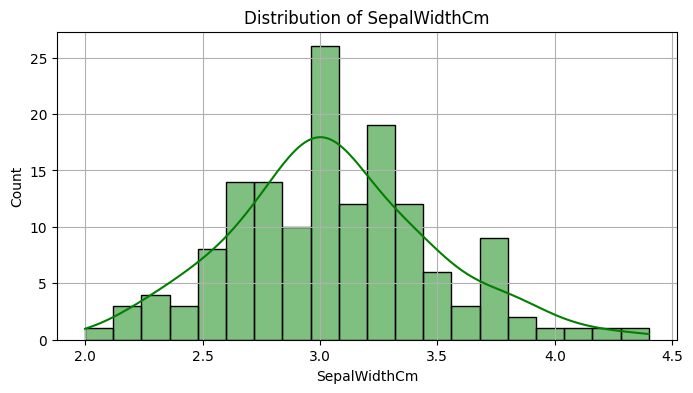

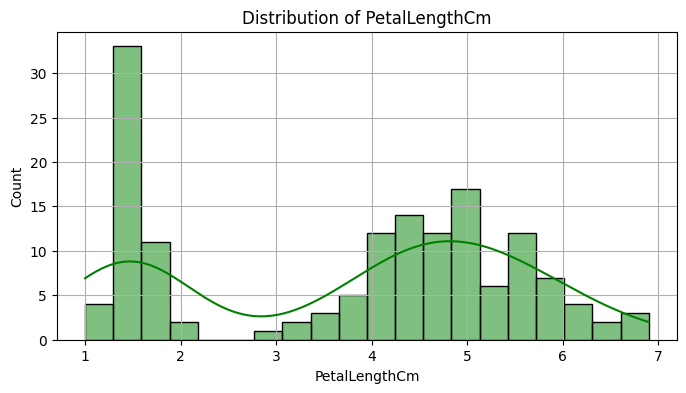

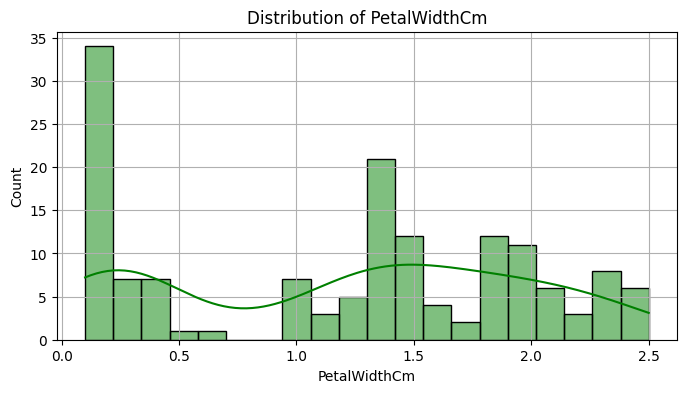

In [10]:
features = df.columns[1:-1] # Except id and Species column
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=20, color='green')
    plt.title(f'Distribution of {feature}')
    plt.grid(True)
    plt.show()

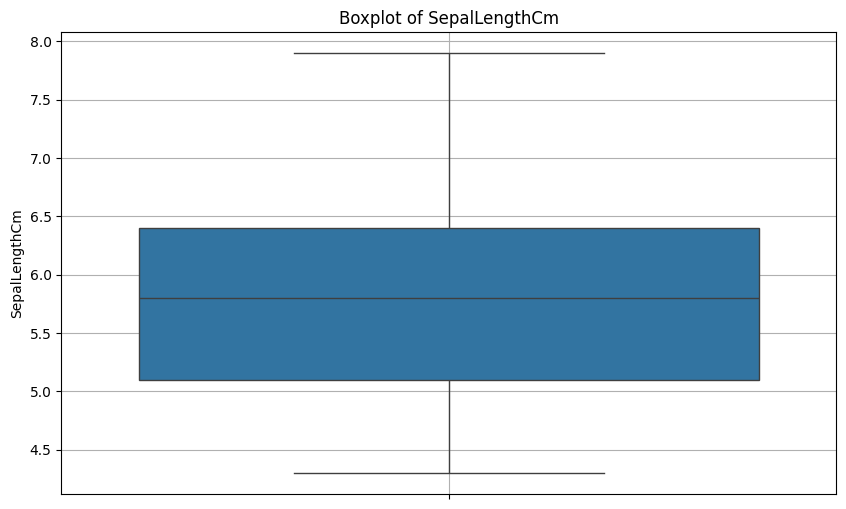

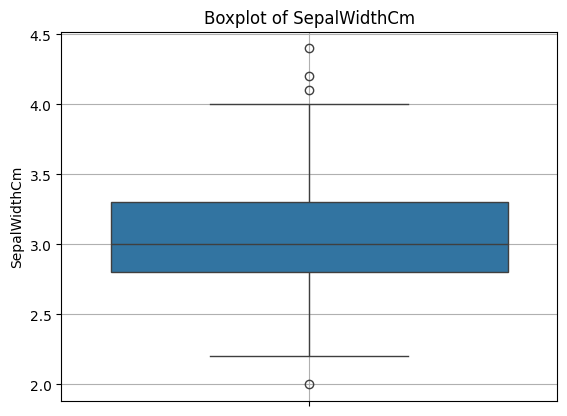

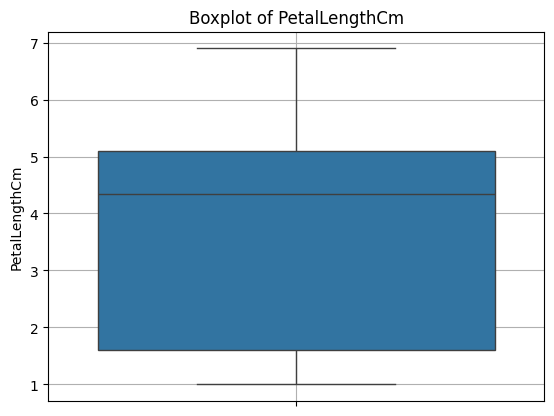

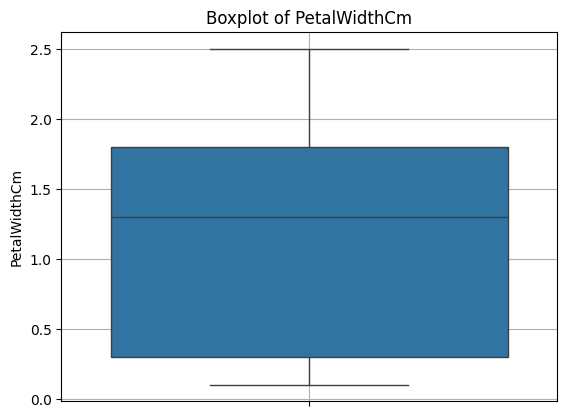

In [11]:
plt.figure(figsize=(10, 6))
for feature in features:
    sns.boxplot(data=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.grid(True)
    plt.show()

### Bivariate Analysis

<Figure size 800x600 with 0 Axes>

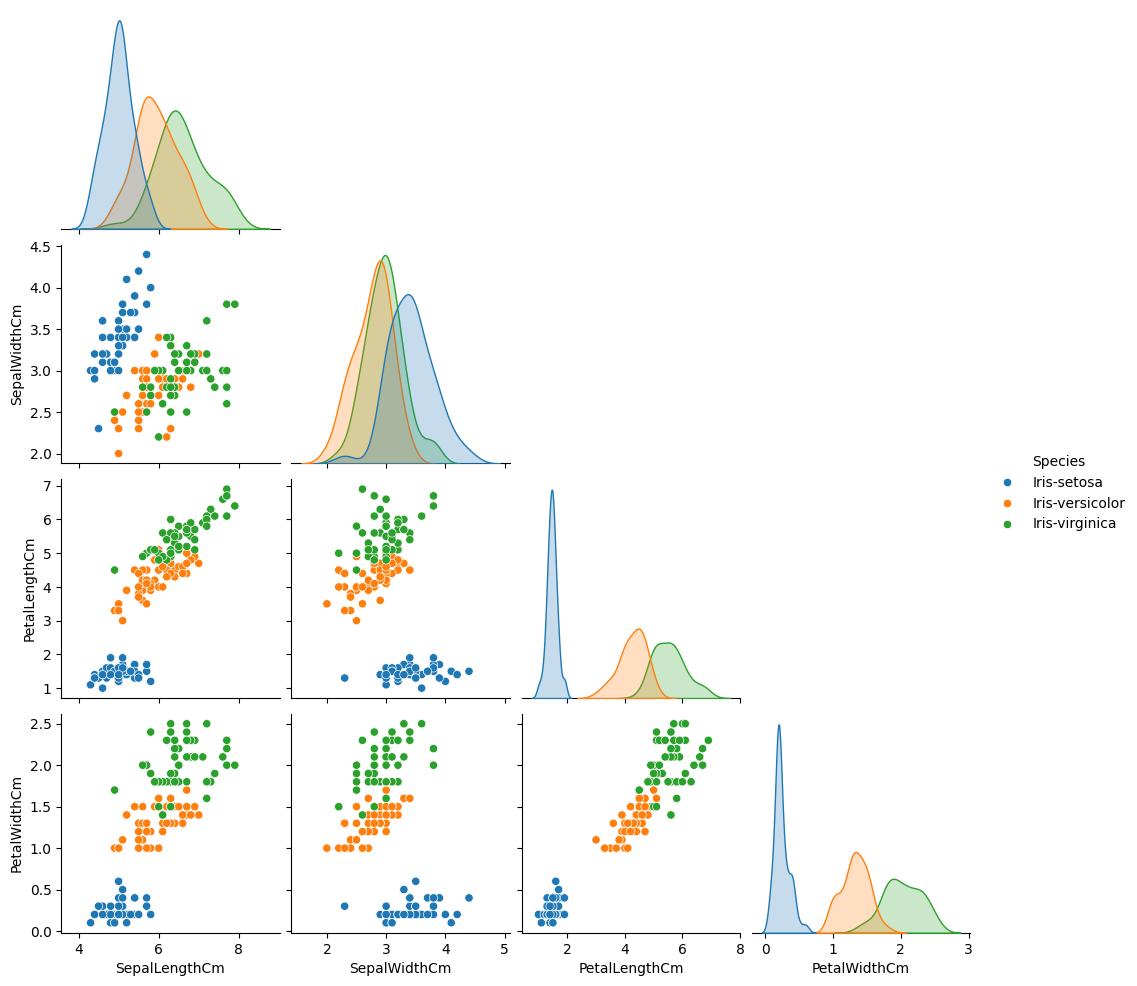

In [12]:
df2 = df.drop("Id", axis=1)


plt.figure(figsize=(8,6))
sns.pairplot(df2, hue='Species', corner=True)
plt.show()


## Insights

1) Petal length and petal width are a strong indicator for classification
2) Setosa linearly seperable from others

### correlation Analysis

In [13]:
plt.figure(figsize=(8,6))
df2.corr(numeric_only=True)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Figure size 800x600 with 0 Axes>

[]

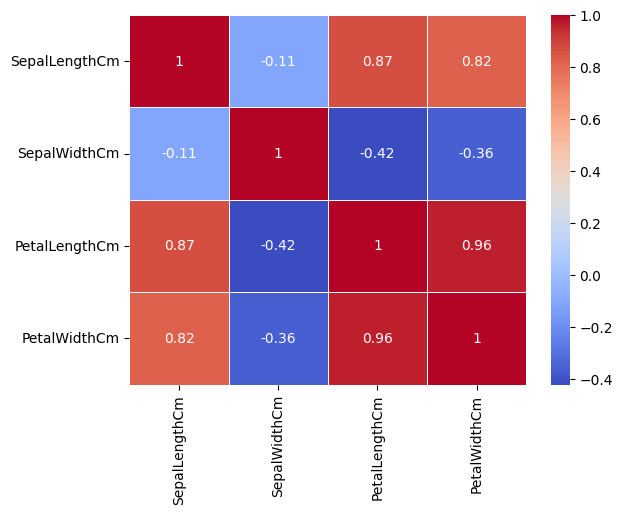

In [14]:
sns.heatmap(df2.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.plot()

### Data distribution by features

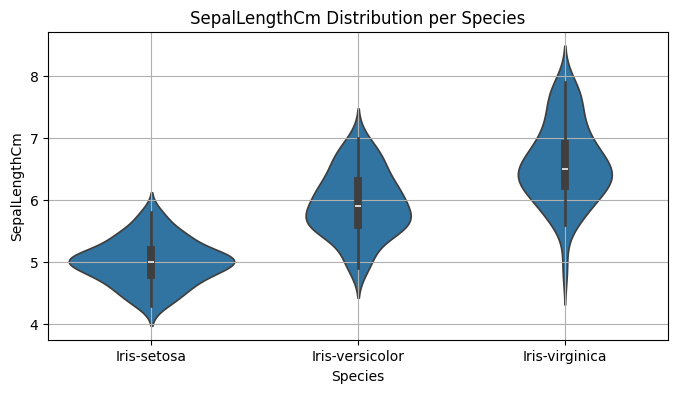

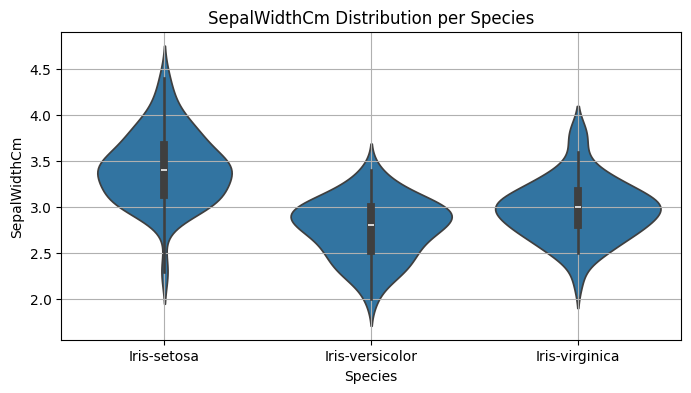

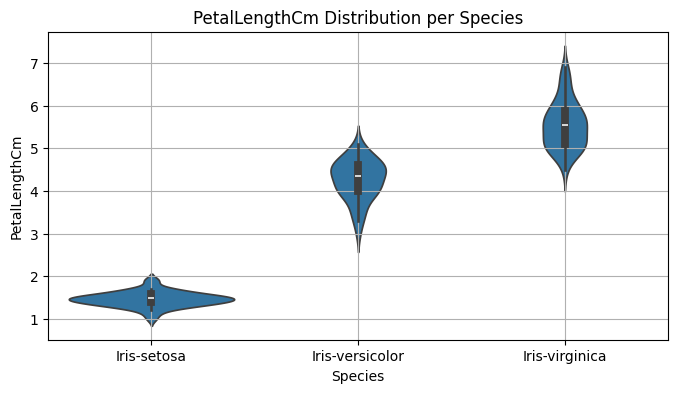

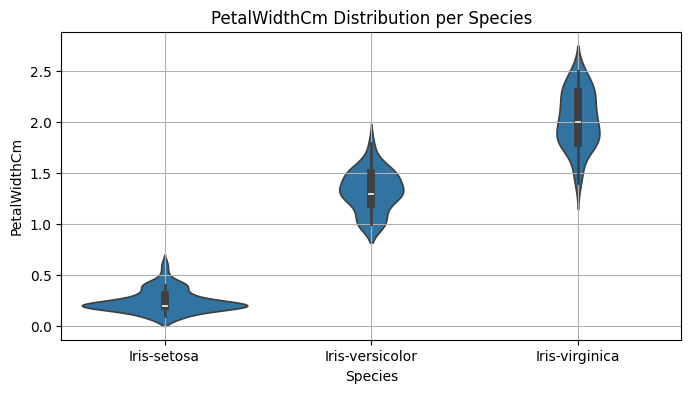

In [15]:
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x='Species', y=feature, data=df)
    plt.title(f'{feature} Distribution per Species')
    plt.grid(True)
    plt.show()

### Insights

1) Setosa has the smallest petal feature
2) Versicolor and Virginica overlap in sepal, diverge in petals

### Petal Dimension by species

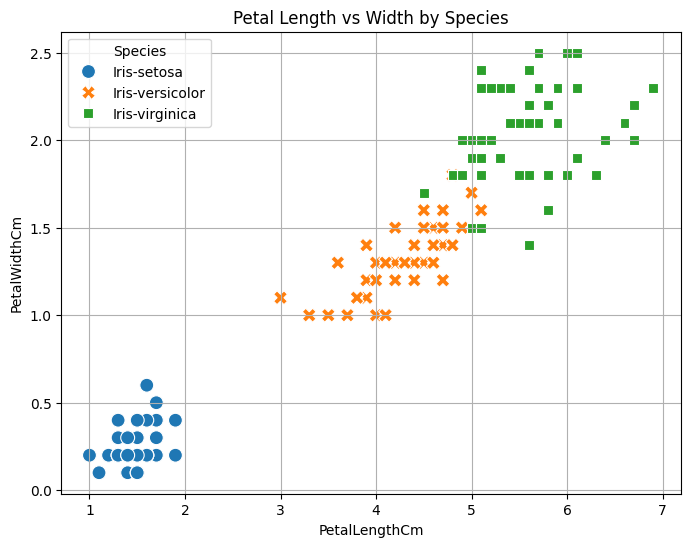

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', style='Species', s=100)
plt.title('Petal Length vs Width by Species')
plt.grid(True)
plt.show()

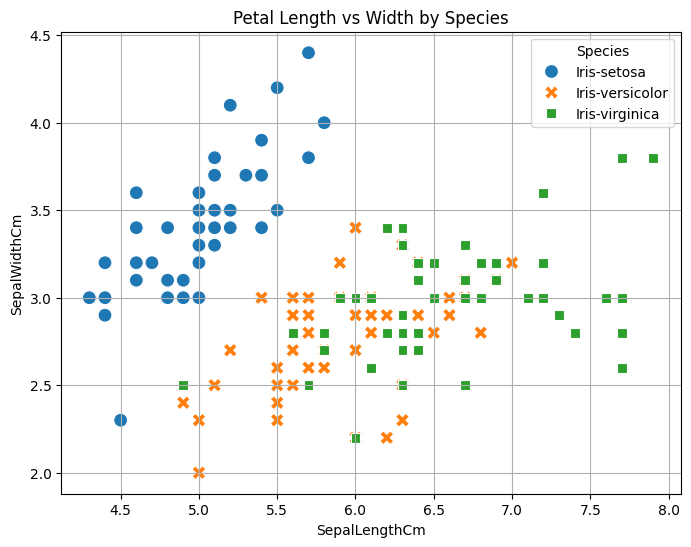

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', style='Species', s=100)
plt.title('Petal Length vs Width by Species')
plt.grid(True)
plt.show()

### Principal Component Analysis

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df2.drop("Species", axis=1))


pca = PCA(n_components=2)
components = pca.fit_transform(scaled)

pca_df = pd.DataFrame(data=components, columns=["PC1","PC2"])
pca_df["Species"] = df2["Species"]

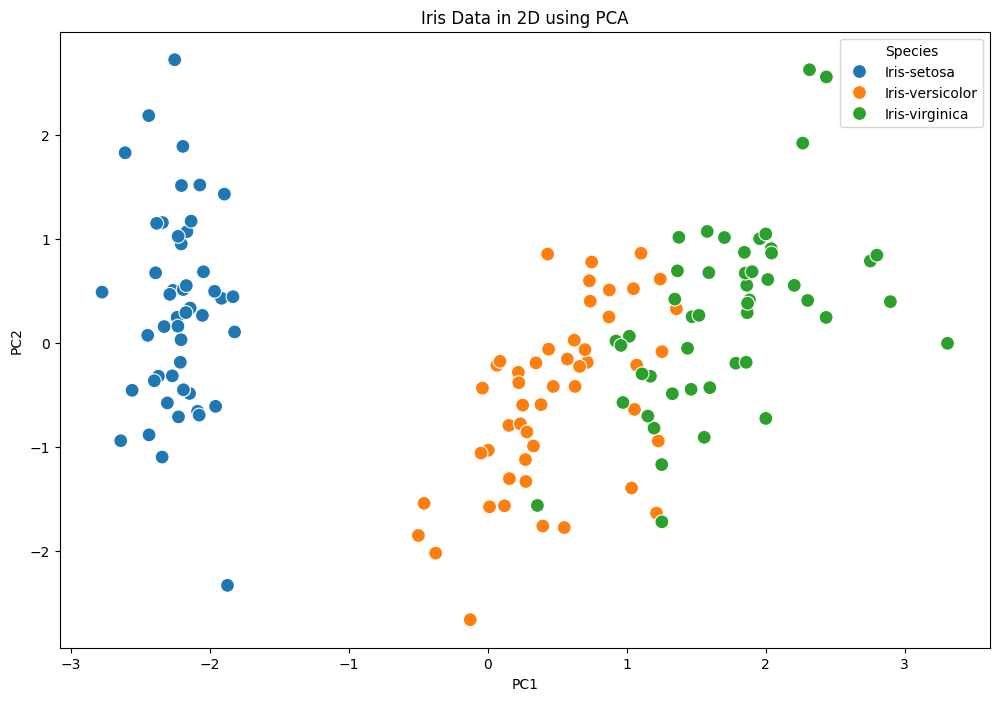

In [27]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Species", s=100)
plt.title("Iris Data in 2D using PCA")
plt.show()

In [37]:
print(f"mean of Petal Length {np.mean(np.array(df['PetalLengthCm']))} in cm")
print(f"mean of Petal Width {np.mean(np.array(df['PetalWidthCm']))} in cm")
print(f"mean of Sepal Length {np.mean(np.array(df['SepalLengthCm']))} in cm")
print(f"mean of Sepal Length {np.mean(np.array(df['SepalWidthCm']))} in cm")

print(f"median of Petal Length {np.median(np.array(df['PetalLengthCm']))} in cm")
print(f"median of Petal Width {np.median(np.array(df['PetalWidthCm']))} in cm")
print(f"median of Sepal Length {np.median(np.array(df['SepalLengthCm']))} in cm")
print(f"median of Sepal Length {np.median(np.array(df['SepalWidthCm']))} in cm")

print(f"Mode of Petal Length: {df['PetalLengthCm'].mode()[0]} cm")
print(f"Mode of Petal Width: {df['PetalWidthCm'].mode()[0]} cm")
print(f"Mode of Sepal Length: {df['SepalLengthCm'].mode()[0]} cm")
print(f"Mode of Sepal Width: {df['SepalWidthCm'].mode()[0]} cm")


mean of Petal Length 3.758666666666666 in cm
mean of Petal Width 1.1986666666666668 in cm
mean of Sepal Length 5.843333333333334 in cm
mean of Sepal Length 3.0540000000000003 in cm
median of Petal Length 4.35 in cm
median of Petal Width 1.3 in cm
median of Sepal Length 5.8 in cm
median of Sepal Length 3.0 in cm
Mode of Petal Length: 1.5 cm
Mode of Petal Width: 0.2 cm
Mode of Sepal Length: 5.0 cm
Mode of Sepal Width: 3.0 cm
